Benjamin Bierlein 76418644
Econ 125 HW 1 Spring 2025

Computer Exercise 1

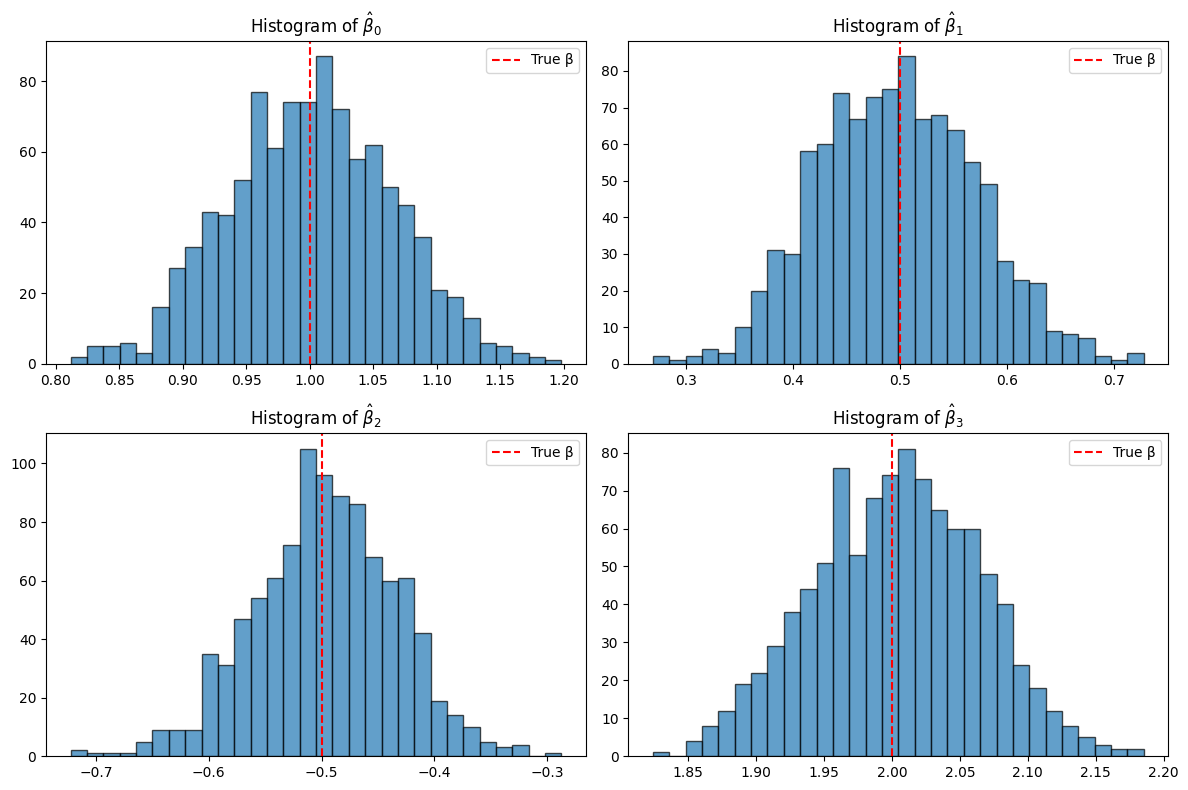

Estimated Means and Standard Errors:
$\hat{\beta}_0$: Mean = 1.0008, SE = 0.0647
$\hat{\beta}_1$: Mean = 0.4973, SE = 0.0735
$\hat{\beta}_2$: Mean = -0.4967, SE = 0.0631
$\hat{\beta}_3$: Mean = 2.0032, SE = 0.0610


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters
n, k = 250, 4
beta_true = np.array([1, 0.5, -0.5, 2])
sigma2 = 1
reps = 1000

#Generate X
np.random.seed(42)
X = np.ones((n, k))
X[:, 1:] = np.random.normal(0, 1, size=(n, k-1))  # can switch to np.random.uniform(-2, 2, ...)

#Storage for beta estimates
beta_ols_samples = np.zeros((reps, k))

#Simulate y and estimate beta_OLS
for i in range(reps):
    epsilon = np.random.normal(0, np.sqrt(sigma2), size=n)
    y = X @ beta_true + epsilon
    beta_ols = np.linalg.inv(X.T @ X) @ (X.T @ y)
    beta_ols_samples[i, :] = beta_ols

#Plot histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
titles = [r'$\hat{\beta}_0$', r'$\hat{\beta}_1$', r'$\hat{\beta}_2$', r'$\hat{\beta}_3$']

for i, ax in enumerate(axs.flatten()):
    ax.hist(beta_ols_samples[:, i], bins=30, alpha=0.7, edgecolor='black')
    ax.axvline(beta_true[i], color='red', linestyle='--', label='True β')
    ax.set_title(f"Histogram of {titles[i]}")
    ax.legend()

plt.tight_layout()
plt.show()

# Means and standard errors
means = beta_ols_samples.mean(axis=0)
std_errors = beta_ols_samples.std(axis=0)

print("Estimated Means and Standard Errors:")
for i in range(k):
    print(f"{titles[i]}: Mean = {means[i]:.4f}, SE = {std_errors[i]:.4f}")


Computer Exercise 2

1) Example 2.6 is on page 78 of the textbook

In [ ]:
##Import necessary packages
import numpy as np  # Useful for math calculations
import pandas as pd  # Useful for data manipulation
import statsmodels.api as sm  # Useful for regression analysis
import statsmodels.formula.api as smf  # Required for regression using formulas
import matplotlib.pyplot as plt  # Useful for plotting

#Load Data
br_df = pd.read_csv("/content/br.csv")
br_df.head()
print(br_df.head())

#Account for sqft^2
br_df["sqft2"] = br_df["sqft"] ** 2

#OLS
example_2_6 = smf.ols(formula="price ~ sqft2", data=br_df).fit()
print(example_2_6.summary())

#Predict price for 1500, 2000, and 4000 sqft
new_data = pd.DataFrame({"sqft": [1500, 2000, 4000], "sqft2": [1500**2, 2000**2, 4000**2]})
predicted_prices = example_2_6.predict(new_data)
print("Predicted Prices:", predicted_prices)

    price  sqft  bedrooms  baths  age  occupancy  pool  style  fireplace  \
0   66500   741         1      1   18          1     1      1          1   
1   66000   741         1      1   18          2     1      1          0   
2   68500   790         1      1   18          1     0      1          1   
3  102000  2783         2      2   18          1     0      1          1   
4   54000  1165         2      1   35          2     0      1          0   

   waterfront  dom  
0           0    6  
1           0   23  
2           0    8  
3           0   50  
4           0  190  
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2426.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):          3.37e-278
Time:                 

Predicted Prices:

1500 sqft: $90,474.49

2000 sqft: $117,461.77

4000 sqft: $302,517.39

2) Example 2.7 is on page 81 of the textbook

In [ ]:
##Import necessary packages
import numpy as np  # Useful for math calculations
import pandas as pd  # Useful for data manipulation
import statsmodels.api as sm  # Useful for regression analysis
import statsmodels.formula.api as smf  # Required for regression using formulas
import matplotlib.pyplot as plt  # Useful for plotting

##Load Data
br_df = pd.read_csv("/content/br.csv")
br_df.head()
print(br_df.head())

#Account for log price
br_df["log_price"] = np.log(br_df["price"])

#OLS
example_2_7 = smf.ols(formula="log_price ~ sqft", data=br_df).fit()
print(example_2_7.summary())

#Predict Prrice for 1500, 2000, and 4000
new_data = pd.DataFrame({"sqft": [1500, 2000, 4000]})
predicted_log_prices = example_2_7.predict(new_data)
predicted_prices = np.exp(predicted_log_prices)
print("Predicted Prices:", predicted_prices)



    price  sqft  bedrooms  baths  age  occupancy  pool  style  fireplace  \
0   66500   741         1      1   18          1     1      1          1   
1   66000   741         1      1   18          2     1      1          0   
2   68500   790         1      1   18          1     0      1          1   
3  102000  2783         2      2   18          1     0      1          1   
4   54000  1165         2      1   35          2     0      1          0   

   waterfront  dom  
0           0    6  
1           0   23  
2           0    8  
3           0   50  
4           0  190  
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1795.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):          1.11e-231
Time:                 

Predicted Prices:

1500 sqft: $94,419.19

2000 sqft: $117,461.77

4000 sqft: $263,991.38